# Using the mongoDB 

## MEGS_DB mongoDB database includes MERIS collocated datasets for ODESA 1.2.4. /MEGS 8.1  MERIS from the 3rd reprocessing.

** in a terminal check:**
    
    ps -xa | grep mongod 
    
to get the location of the mongodb config file

My data base is at 

    dbpath=/var/lib/mongodb

## Turbidity and SPM modelled functions (FNU units)
See also [ipython notebook](http://localhost:8888/notebooks/%5BMethod%204%20Elina's%5D%20Turbidity%20and%20SPM%20validation-Validation_SPM_with_Matchups-using-reflectance_06.ipynb) \[Method 4 Elina's\] Turbidity and SPM validation-Validation\_SPM\_with\_Matchups-using-reflectance\_06).

# Calculating $\rho_w$ from Rrs

The $R_{rs}$ is related to $\rho_w (\lambda)$ by:

$\rho_w (\lambda) = \pi R_{rs}$


$R_{rs}$ in MEGS is the **nrrs** intermediate product

**Reference**: [Meris Optical Measurement Protocols](http://hermes.acri.fr/mermaid/dataproto/CO-SCI-ARG-TN-0008_MERIS_Optical_Measurement_Protocols_Issue2_Aug2011.pdf) page 10. 

See also the ODESA forum [normalization in Odesa](http://www.odesa-info.eu/forum/viewtopic.php?f=16&t=107&p=155&hilit=remote+sensing+reflectance&sid=740420998c703edfaa95a3cc2ad2c027#p155) for details regarding **nrrs**.



In [1]:
import sys
import os.path
from sys import argv, exit
# Using the MathJax library to display the Latex.
from IPython.display import Math
#
import numpy as np
import pandas as pd
import os
os.chdir("/home/jobel/gits/jobel")

In [2]:
# Loading data using pandas
#filepath = "/home/jobel/Dropbox/ElinasPaper/sourceData/Elina_TSPM_2010_2014.txt"
filepath = "/home/jobel/Dropbox/NEOData/NEOTables/tbl_insitu.txt"
insitu = pd.read_csv(sep = "\t", filepath_or_buffer = filepath)
insitu.rename(columns = {'IS_DATE':'date_string'}, inplace=True)
#insitu['date_string']

In [3]:
import numpy as np
import os
os.chdir("/home/jobel/gits/jobel")
from bigdata import fetch_band_array_from_mongodb
# Calculating rhow_06 and inserting into quality db
from pymongo import MongoClient
# Using MongoDB URI format
client = MongoClient('mongodb://localhost:27017/')
# Getting a Database.
db_name = "MEGS_quality"
target_db = client[db_name]
target_db.collection_names()
#

[u'Kd490_Alikas2013',
 u'Kd490_Alikas2014',
 u'Kd490_Kratzer2014',
 u'KdPAR_Kratzer2014',
 u'c_490_Alikas2013',
 u'chlorophyll_2',
 u'exp_logspm_modelled',
 u'log_spm_meris',
 u'log_spm_modelled',
 u'nrrs_03',
 u'nrrs_06',
 u'nrrs_09',
 u'rhow_03',
 u'rhow_06',
 u'rhow_09',
 u'secchi_alikas2013',
 u'secchi_kratzer2014',
 u'spm_modelled',
 u'suspended_particle_matter',
 u'system.indexes',
 u'turbidity_nechad',
 u'yellow_substance']

In [4]:
from utils.transform_datetime import date_to_week_number # (date_string)
from collections import OrderedDict
# Building available dates dictionary
collection_key = 'exp_logspm_modelled'
dates_dict = [doc['meris_date'] for doc in target_db[collection_key].find()]
dates = OrderedDict()
for date_string in sorted(dates_dict):
    week = date_to_week_number(date_string)
    month = int(date_string[4:6])
    year = int(date_string[0:4])
    dates[date_string] = (year,month,week)

# (u'20100425', (2010, 4, 16)),
# (u'20100502', (2010, 5, 17)),
# (u'20100511', (2010, 5, 19)),
# (u'20080728', (2008, 7, 31)),

In [5]:
dates

OrderedDict([(u'20020615', (2002, 6, 24)),
             (u'20020618', (2002, 6, 25)),
             (u'20020619', (2002, 6, 25)),
             (u'20020726', (2002, 7, 30)),
             (u'20020730', (2002, 7, 31)),
             (u'20020805', (2002, 8, 32)),
             (u'20020808', (2002, 8, 32)),
             (u'20020813', (2002, 8, 33)),
             (u'20020815', (2002, 8, 33)),
             (u'20020819', (2002, 8, 34)),
             (u'20020822', (2002, 8, 34)),
             (u'20020830', (2002, 8, 35)),
             (u'20030310', (2003, 3, 11)),
             (u'20030313', (2003, 3, 11)),
             (u'20030320', (2003, 3, 12)),
             (u'20030416', (2003, 4, 16)),
             (u'20030417', (2003, 4, 16)),
             (u'20030421', (2003, 4, 17)),
             (u'20030423', (2003, 4, 17)),
             (u'20030430', (2003, 4, 18)),
             (u'20030509', (2003, 5, 19)),
             (u'20030517', (2003, 5, 20)),
             (u'20030522', (2003, 5, 21)),
           

# Plotting the data

In [11]:
from bigdata import fetch_band_array_from_mongodb
db_name = "MEGS_quality"
#
spm_meris = {}
spm_modelled = {}
log_spm_meris = {}
log_spm_modelled = {}
exp_logspm_modelled = {}
#
date_string = "20100425" #"20080728" # "20100511" # "20100315"
spm_meris[date_string] = fetch_band_array_from_mongodb(db_name,"suspended_particle_matter", date_string)
spm_modelled[date_string] = fetch_band_array_from_mongodb(db_name,'spm_modelled', date_string)
log_spm_meris[date_string] = fetch_band_array_from_mongodb(db_name,'log_spm_meris', date_string)
log_spm_modelled[date_string] = fetch_band_array_from_mongodb(db_name,'log_spm_modelled', date_string)
exp_logspm_modelled[date_string] = fetch_band_array_from_mongodb(db_name,'exp_logspm_modelled', date_string)
#
date_string = "20100502" #"20100511"
spm_meris[date_string] = fetch_band_array_from_mongodb(db_name,"suspended_particle_matter", date_string)
spm_modelled[date_string] = fetch_band_array_from_mongodb(db_name,'spm_modelled', date_string)
log_spm_meris[date_string] = fetch_band_array_from_mongodb(db_name,'log_spm_meris', date_string)
log_spm_modelled[date_string] = fetch_band_array_from_mongodb(db_name,'log_spm_modelled', date_string)
exp_logspm_modelled[date_string] = fetch_band_array_from_mongodb(db_name,'exp_logspm_modelled', date_string)

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors
from matplotlib import artist
from matplotlib import rc, rcParams
rc('mathtext', default='regular')
rc('font', family='sans-serif') 
rc('font', serif='Arial') 
#rc('text', usetex='false') 
rcParams.update({'font.size': 24})
%matplotlib inline

KeyError: '20100511'

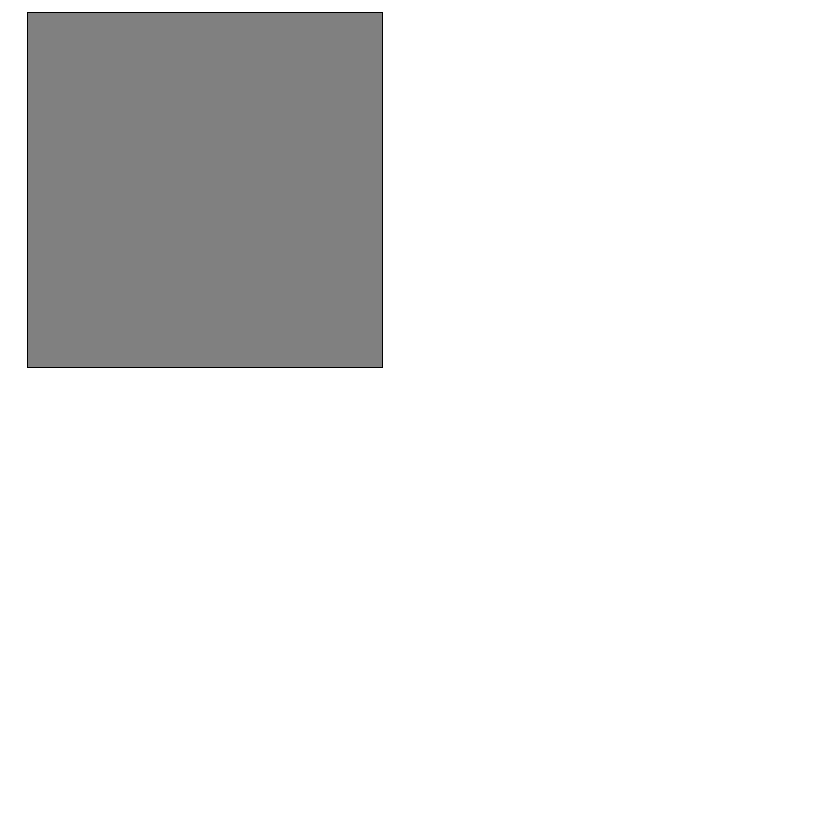

In [13]:
# ## Used for quad l2p plotting

fig = plt.figure(figsize=(14,14))# dpi=1800 # figsize=figsize, frameon=False
ax = plt.gca()
ax.axis('off')
fig.patch.set_facecolor('white')
#plt.suptitle("MEGS") # DATE: " + date_string[:4] + "-" + date_string[4:6] + "-" + date_string[6:8])
ax1 = fig.add_subplot(2, 2, 1)
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
ax1.set_axis_bgcolor('grey')
#
im_spm = plt.imshow(spm_meris["20100511"])
#
# Discrete colours 
cmap = plt.cm.spectral
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
# define the bins and normalize
bounds = np.arange(0, 2 + 1,0.1) #(0, 14+1)
norm = colors.BoundaryNorm(bounds, cmap.N)

im_spm.set_cmap(cmap)
im_spm.set_norm(norm)


divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size = "5%", pad = 0.05)
cbar = plt.colorbar(im_spm, cax = cax)  #use_gridspec=True
im_spm.set_clim(0, 3) # (0,14)
cbar.set_label('SPM [g /m^3]')
#if key == "SPM":
#    cbar.set_label('SPM [g /m^3]')
#else:
#    cbar.set_label('CHECK MY UNITS')
    
ax1.set_title("MERIS 20100511" )
# ########################################################
ax2 = fig.add_subplot(2, 2, 2)
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)
ax2.set_axis_bgcolor('gray')

#
im_sID = plt.imshow(spm_modelled["20100511"])

#im_sID = plt.imshow(masked_band["sID"])
#
# Discrete colours 
cmap = plt.cm.spectral
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# force the last color entry to be white, and the first to be black 
#cmaplist[-1] = (1, 1, 1, 1)
#cmaplist[0] = (0, 0, 0, 1)
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
# define the bins and normalize
bounds = np.arange(0, 2 + 1,0.1)#(0, 14+1)
norm = colors.BoundaryNorm(bounds, cmap.N)

im_sID.set_cmap(cmap)
im_sID.set_norm(norm)

divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size = "5%", pad = 0.05)
cbar = plt.colorbar(im_sID, cax = cax)
im_sID.set_clim(0,3)
cbar.set_label('SPM [g /m^3]')
#cbar.set_label('Subbasin ID')
ax2.set_title("modelled 20100511")

####################################################3
ax3 = fig.add_subplot(2, 2, 3)
ax3.xaxis.set_visible(False)
ax3.yaxis.set_visible(False)
ax3.set_axis_bgcolor('gray')

#
im_sID = plt.imshow(log_spm_meris["20100511"]) #"20080728"

#im_sID = plt.imshow(masked_band["sID"])
#
# Discrete colours 
cmap = plt.cm.spectral
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# force the last color entry to be white, and the first to be black 
#cmaplist[-1] = (1, 1, 1, 1)
#cmaplist[0] = (0, 0, 0, 1)
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
# define the bins and normalize
bounds = np.arange(0, 1 + 1,0.05)#(0, 14+1)
norm = colors.BoundaryNorm(bounds, cmap.N)

im_sID.set_cmap(cmap)
im_sID.set_norm(norm)

divider = make_axes_locatable(ax3)
cax = divider.append_axes("right", size = "5%", pad = 0.05)
cbar = plt.colorbar(im_sID, cax = cax)
im_sID.set_clim(0,2)
cbar.set_label('log SPM [g /m^3]')
#cbar.set_label('Subbasin ID')
ax3.set_title("log MERIS 20100511")
###################
#
ax4 = fig.add_subplot(2, 2, 4)
ax4.xaxis.set_visible(False)
ax4.yaxis.set_visible(False)
ax4.set_axis_bgcolor('gray')

#
im_sID = plt.imshow(log_spm_modelled["20100511"])

#im_sID = plt.imshow(masked_band["sID"])
#
# Discrete colours 
cmap = plt.cm.spectral
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# force the last color entry to be white, and the first to be black 
#cmaplist[-1] = (1, 1, 1, 1)
#cmaplist[0] = (0, 0, 0, 1)
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
# define the bins and normalize
bounds = np.arange(0, 1 + 1,0.05)#(0, 14+1)
norm = colors.BoundaryNorm(bounds, cmap.N)

im_sID.set_cmap(cmap)
im_sID.set_norm(norm)

divider = make_axes_locatable(ax4)
cax = divider.append_axes("right", size = "5%", pad = 0.05)
cbar = plt.colorbar(im_sID, cax = cax)
im_sID.set_clim(0,2)
cbar.set_label('log SPM [g /m^3]')
#cbar.set_label('Subbasin ID')
ax4.set_title("log modelled 20100511")


###################################


plt.subplots_adjust()  # top = 0.85, left = 0.15, right = 0.85
## pad=0 clips some of the texts by a few pixels.
## This may be a bug or a limitation of the current algorithm and it is not clear why it happens.
## Meanwhile, use of pad at least larger than 0.3 is recommended.
plt.tight_layout(pad = 0.5)#pad = 0.5



plt.show()

In [14]:
# Use the following to get a georeferenced map with a shapefile for coastlines
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.patches import PathPatch

# 
from nansat import Nansat
n1 = Nansat('/home/jobel/Dropbox/GIS_repository/subbasinID.img')
lons, lats = n1.get_geolocation_grids()

11:13:43|30|mapper_generic|add_gcps_from_variables|Error: /home/jobel/Dropbox/GIS_repository/subbasinID.img is not a valid NetCDF 3 file
11:13:43|30|mapper_generic|__init__|Use generic mapper - OK!


In [15]:
# Better colormap
import os
import pickle
dirname = "/home/jobel/Dropbox/Manuscripts_EOData2015/Manuscript_IV/colormap"
filename = "matplotlib_option_D.pickle"
with open(os.path.join(dirname,filename),"rb") as handle:
    cmap_D =  pickle.load(handle)
plt.register_cmap(cmap=cmap_D)

In [16]:
#This will center the map over Himmerfjärden
lon_0=17.716677
lat_0=59.0
#
llcrnrlon=17.4336149528
llcrnrlat=58.6214157187
urcrnrlon=18.235#9#3#443634
urcrnrlat=59.1725424757

KeyError: '20100511'

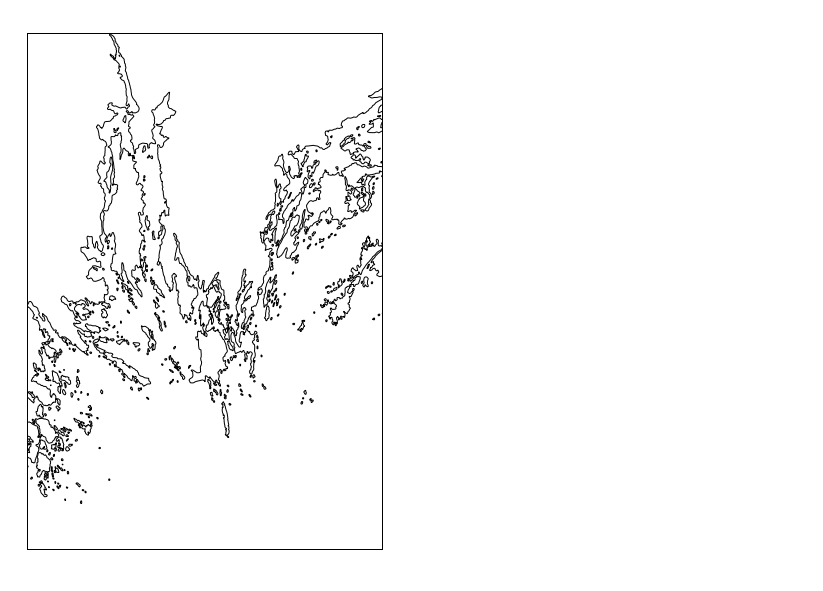

In [17]:
# ## Used for dual l2p plotting
date_string = "20100511"# "20080715"
fig = plt.figure(figsize=(14,10), dpi=600)  # figsize=figsize, frameon=False
#fig = plt.gcf()
#fig.set_size_inches(2,3.5)

ax = plt.gca()
ax.axis('off')
fig.patch.set_facecolor('white')
#plt.suptitle("MEGS DATE: " + date_string[:4] + "-" + date_string[4:6] + "-" + date_string[6:8])
ax1 = fig.add_subplot(1, 2, 1)
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)

#
#im_spm = plt.imshow(spm_meris[date_string])
#

################################
m = Basemap(projection='tmerc',lon_0=lon_0,lat_0=lat_0,
            k_0=0.9996, epsg=5650,
            llcrnrlon=llcrnrlon,llcrnrlat=llcrnrlat,urcrnrlon=urcrnrlon,urcrnrlat=urcrnrlat,
            resolution='i', ax=ax1 )
m.drawmapboundary(fill_color='white')
# Reading the shapefile
m.readshapefile('/home/jobel/Dropbox/GIS_repository/Himmer_LatLon', 'himmer', drawbounds = False) # 
patches   = []

for info, shape in zip(m.himmer_info, m.himmer):
    #if info['nombre'] == 'Selva':
    patches.append( Polygon(np.array(shape), True) )
        
ax1.add_collection(PatchCollection(patches, facecolor= 'none', edgecolor='k', linewidths=1., zorder=2))
################################3

#
# Discrete colours 
cmap = cmap_D#plt.cm.spectral
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# Adjusting the last colour to darker red
#cmaplist[-1] = '#990000'
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
# define the bins and normalize
bounds = np.arange(0, 2 + 1, 0.1) #(0, 14+1)
norm = colors.BoundaryNorm(bounds, cmap.N)

#im_spm.set_cmap(cmap)
#im_spm.set_norm(norm)
################################################################
data = spm_meris[date_string]

data = np.fliplr(np.rot90(data,2))
m.imshow(data, cmap = cmap, norm=norm)
################################################################
ax1.set_axis_bgcolor('grey')


divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size = "5%", pad = 0.05)
cbar = plt.colorbar(im_spm, cax = cax)  #use_gridspec=True
im_spm.set_clim(0, 10) # (0,14)
cbar.set_label("$SPM\;(g\,m^{-3})$")
#if key == "SPM":
#    cbar.set_label('SPM [g /m^3]')
#else:
#    cbar.set_label('CHECK MY UNITS')
    
#ax1.set_title("2008-07-15", fontsize=24)
#
ax1.text(0.01, 1.01, "(a) MERIS SPM, 2010-05-11",
        horizontalalignment='left',
        fontsize=20,
        transform = ax1.transAxes, color = "black")

cbar.remove()

#####################################
ax2 = fig.add_subplot(1, 2, 2)
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)
ax2.set_axis_bgcolor('grey')

#
date_string = "20100511" #"20080715"
#im_sID = plt.imshow(exp_logspm_modelled[date_string])
####################################################################
m2 = Basemap(projection='tmerc',lon_0=lon_0,lat_0=lat_0,
            k_0=0.9996, epsg=5650,
            llcrnrlon=llcrnrlon,llcrnrlat=llcrnrlat,urcrnrlon=urcrnrlon,urcrnrlat=urcrnrlat,
            resolution='i', ax=ax2 )
m2.drawmapboundary(fill_color='white')
# Reading the shapefile
m2.readshapefile('/home/jobel/Dropbox/GIS_repository/Himmer_LatLon', 'himmer', drawbounds = False) # 
patches   = []

for info, shape in zip(m2.himmer_info, m2.himmer):
    #if info['nombre'] == 'Selva':
    patches.append( Polygon(np.array(shape), True) )
        
ax2.add_collection(PatchCollection(patches, facecolor= 'none', edgecolor='k', linewidths=1., zorder=2))
###########################################################################3
#
# Discrete colours 
cmap = cmap_D#plt.cm.spectral
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# Adjusting the last colour to darker red
# force the last color entry to be white, and the first to be black 
#cmaplist[-1] = '#990000' #'#660000'
#cmaplist[0] = (0, 0, 0, 1)
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
# define the bins and normalize
bounds = np.arange(0, 2 + 1, 0.1) #(0, 14+1)
norm = colors.BoundaryNorm(bounds, cmap.N)

im_sID.set_cmap(cmap)
im_sID.set_norm(norm)

################################################################
data = exp_logspm_modelled[date_string]

data = np.fliplr(np.rot90(data,2))
m2.imshow(data, cmap = cmap, norm=norm)
################################################################
ax2.set_axis_bgcolor('grey')


divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size = "5%", pad = 0.05)
cbar = plt.colorbar(im_sID, cax = cax)
im_sID.set_clim(0, 10)
cbar.set_label("$SPM\;(g\,m^{-3})$", fontsize=20)
cbar.ax.tick_params(labelsize=20) 
#plt.colorbar().set_label(label='a label',size=15,weight='bold')
#cbar.set_label('Subbasin ID')

#ax2.set_title("2008-07-15", fontsize=24)
ax2.text(0.01, 1.01, "(b) SPM modelled, 2010-05-11",
        horizontalalignment='left',
        fontsize=20,
        transform = ax2.transAxes, color = "black")

plt.subplots_adjust()  # top = 0.85, left = 0.15, right = 0.85
## pad=0 clips some of the texts by a few pixels.
## This may be a bug or a limitation of the current algorithm and it is not clear why it happens.
## Meanwhile, use of pad at least larger than 0.3 is recommended.
plt.tight_layout(pad = 0.5)
plt.show()

KeyError: '20100511'

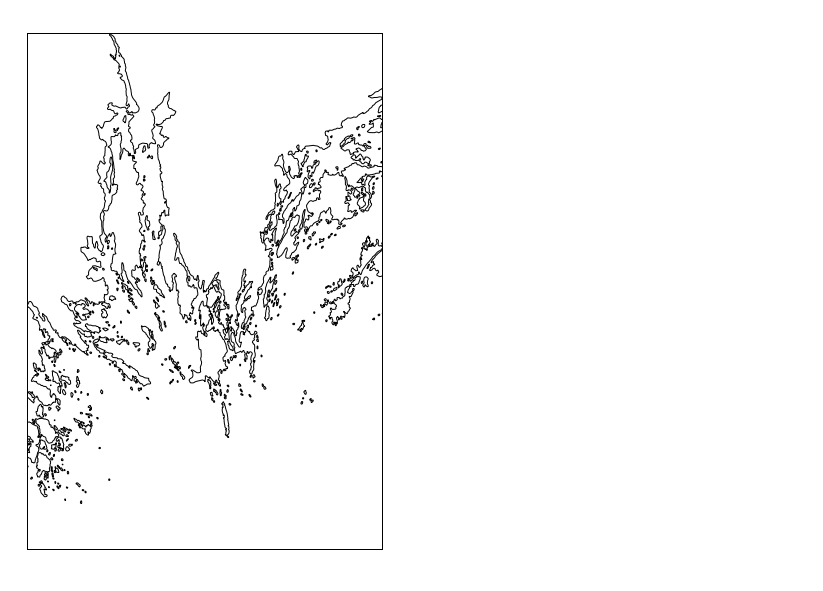

In [19]:
# ## Used for dual l2p plotting
date_string = "20100511"#"20080728"
# ## Used for dual l2p plotting
#date_string = "20080715"
fig = plt.figure(figsize=(14,10), dpi=600)  # figsize=figsize, frameon=False
#fig = plt.gcf()
#fig.set_size_inches(2,3.5)

ax = plt.gca()
ax.axis('off')
fig.patch.set_facecolor('white')
#plt.suptitle("MEGS DATE: " + date_string[:4] + "-" + date_string[4:6] + "-" + date_string[6:8])
ax1 = fig.add_subplot(1, 2, 1)
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
ax1.set_axis_bgcolor('grey')
#
#im_spm = plt.imshow(spm_meris[date_string])
################################
m = Basemap(projection='tmerc',lon_0=lon_0,lat_0=lat_0,
            k_0=0.9996, epsg=5650,
            llcrnrlon=llcrnrlon,llcrnrlat=llcrnrlat,urcrnrlon=urcrnrlon,urcrnrlat=urcrnrlat,
            resolution='i', ax=ax1 )
m.drawmapboundary(fill_color='white')
# Reading the shapefile
m.readshapefile('/home/jobel/Dropbox/GIS_repository/Himmer_LatLon', 'himmer', drawbounds = False) # 
patches   = []

for info, shape in zip(m.himmer_info, m.himmer):
    #if info['nombre'] == 'Selva':
    patches.append( Polygon(np.array(shape), True) )
        
ax1.add_collection(PatchCollection(patches, facecolor= 'none', edgecolor='k', linewidths=1., zorder=2))
################################3


#
# Discrete colours 
cmap = cmap_D#plt.cm.spectral
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# Adjusting the last colour to darker red
#cmaplist[-1] = '#990000'
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
# define the bins and normalize
bounds = np.arange(0, 2 + 1, 0.1) #(0, 14+1)
norm = colors.BoundaryNorm(bounds, cmap.N)

#im_spm.set_cmap(cmap)
#im_spm.set_norm(norm)

################################################################
data = spm_meris[date_string]

data = np.fliplr(np.rot90(data,2))
m.imshow(data, cmap = cmap, norm=norm)
################################################################
ax1.set_axis_bgcolor('grey')


divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size = "5%", pad = 0.05)
cbar = plt.colorbar(im_spm, cax = cax)  #use_gridspec=True
im_spm.set_clim(0, 10) # (0,14)
cbar.set_label("$SPM\;(g\,m^{-3})$")
#if key == "SPM":
#    cbar.set_label('SPM [g /m^3]')
#else:
#    cbar.set_label('CHECK MY UNITS')
    
#ax1.set_title("2008-07-28", fontsize=24)
#
ax1.text(0.01, 1.01, "(c) MERIS SPM, 2010-05-11",
        horizontalalignment='left',
        fontsize=20,
        transform = ax1.transAxes, color = "black")

cbar.remove()

#####################################
ax2 = fig.add_subplot(1, 2, 2)
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)
ax2.set_axis_bgcolor('grey')

#

#im_sID = plt.imshow(exp_logspm_modelled[date_string])
####################################################################
m2 = Basemap(projection='tmerc',lon_0=lon_0,lat_0=lat_0,
            k_0=0.9996, epsg=5650,
            llcrnrlon=llcrnrlon,llcrnrlat=llcrnrlat,urcrnrlon=urcrnrlon,urcrnrlat=urcrnrlat,
            resolution='i', ax=ax2 )
m2.drawmapboundary(fill_color='white')
# Reading the shapefile
m2.readshapefile('/home/jobel/Dropbox/GIS_repository/Himmer_LatLon', 'himmer', drawbounds = False) # 
patches   = []

for info, shape in zip(m2.himmer_info, m2.himmer):
    #if info['nombre'] == 'Selva':
    patches.append( Polygon(np.array(shape), True) )
        
ax2.add_collection(PatchCollection(patches, facecolor= 'none', edgecolor='k', linewidths=1., zorder=2))
###########################################################################3

#
# Discrete colours 
cmap = cmap_D#plt.cm.spectral
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# Adjusting the last colour to darker red
# force the last color entry to be white, and the first to be black 
#cmaplist[-1] = '#990000' #'#660000'
#cmaplist[0] = (0, 0, 0, 1)
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
# define the bins and normalize
bounds = np.arange(0, 2 + 1, 0.1) #(0, 14+1)
norm = colors.BoundaryNorm(bounds, cmap.N)

im_sID.set_cmap(cmap)
im_sID.set_norm(norm)

################################################################
data = exp_logspm_modelled[date_string]

data = np.fliplr(np.rot90(data,2))
m2.imshow(data, cmap = cmap, norm=norm)
################################################################
ax2.set_axis_bgcolor('grey')


divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size = "5%", pad = 0.05)
cbar = plt.colorbar(im_sID, cax = cax)
im_sID.set_clim(0, 10)
cbar.set_label("$SPM\;(g\,m^{-3})$", fontsize=20)
cbar.ax.tick_params(labelsize=20) 
#plt.colorbar().set_label(label='a label',size=15,weight='bold')
#cbar.set_label('Subbasin ID')

#ax2.set_title("2008-07-28", fontsize=24)
ax2.text(0.01, 1.01, "(d) SPM modelled, 2010-05-11",
        horizontalalignment='left',
        fontsize=20,
        transform = ax2.transAxes, color = "black")

plt.subplots_adjust()  # top = 0.85, left = 0.15, right = 0.85
## pad=0 clips some of the texts by a few pixels.
## This may be a bug or a limitation of the current algorithm and it is not clear why it happens.
## Meanwhile, use of pad at least larger than 0.3 is recommended.
plt.tight_layout(pad = 0.5)
plt.show()

In [ ]:
################# FINAL

AttributeError: 'Basemap' object has no attribute 'set_cmap'

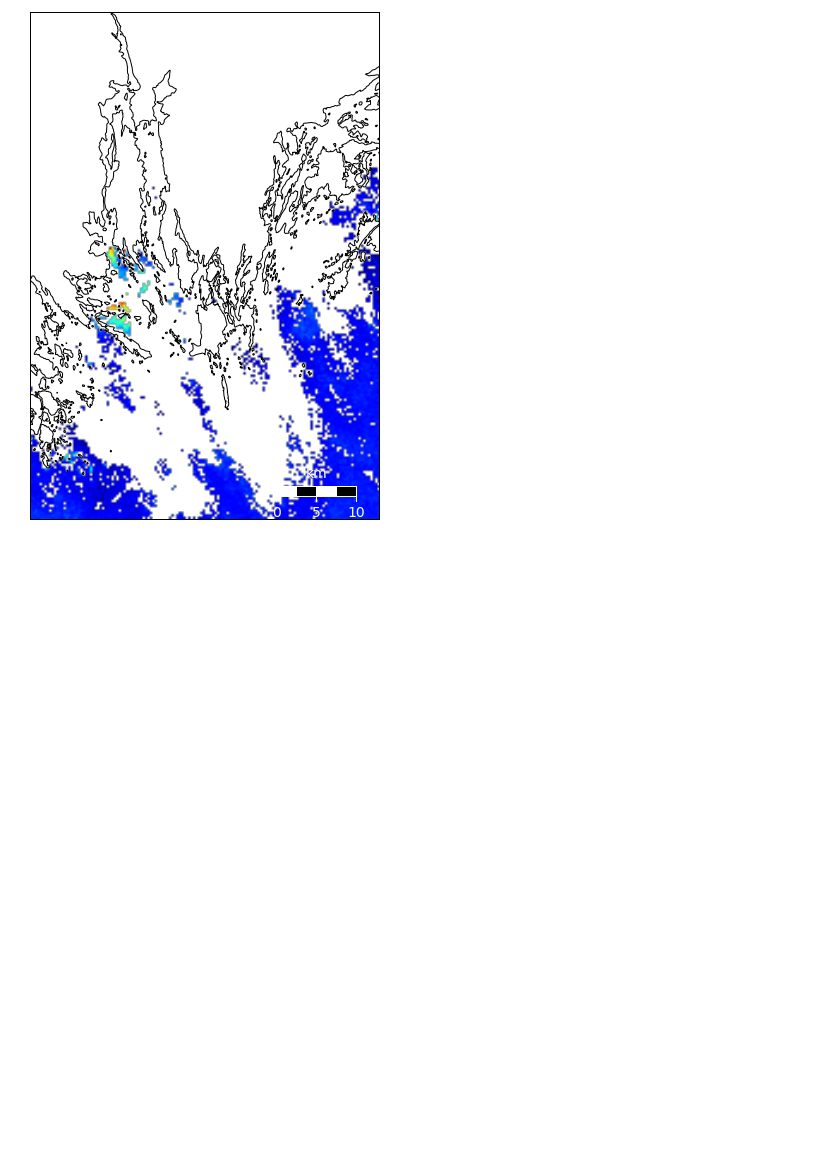

In [23]:
# ## Used for quad  l2p plotting
my_dpi = 600 #(3719, 2519)
fig = plt.figure(figsize=(14,20), dpi=300)  #figsize=(1008/my_dpi, 1450/my_dpi), dpi=my_dpi)
#fig = plt.gcf()
#fig.set_size_inches(2,3.5)

ax = plt.gca()
ax.axis('off')
fig.patch.set_facecolor('white')
#plt.suptitle("MEGS DATE: " + date_string[:4] + "-" + date_string[4:6] + "-" + date_string[6:8])
ax1 = fig.add_subplot(2, 2, 1)
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)

#
#im_spm = plt.imshow(spm_meris[date_string])
#

################################
m = Basemap(projection='tmerc',lon_0=lon_0,lat_0=lat_0,
            k_0=0.9996, epsg=5650,
            llcrnrlon=llcrnrlon,llcrnrlat=llcrnrlat,urcrnrlon=urcrnrlon,urcrnrlat=urcrnrlat,
            resolution='i', ax=ax1 )
m.drawmapboundary(fill_color='white')
# Reading the shapefile
m.readshapefile('/home/jobel/Dropbox/GIS_repository/Himmer_LatLon', 'himmer', drawbounds = False) # 
patches   = []

for info, shape in zip(m.himmer_info, m.himmer):
    #if info['nombre'] == 'Selva':
    patches.append( Polygon(np.array(shape), True) )
        
ax1.add_collection(PatchCollection(patches, facecolor= 'none', edgecolor='k', linewidths=1., zorder=2))
#
m.drawmapscale(ax=ax1,lon=18.05, lat=58.64,
               lon0=lon_0, lat0=lat_0, length=10, fontsize=14,
               barstyle='fancy',units='km', labelstyle='simple', fontcolor='white')

################################3

#
# Discrete colours 
cmap = cmap_D#plt.cm.spectral
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# Adjusting the last colour to darker red
#cmaplist[-1] = '#990000'
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
# define the bins and normalize
bounds = np.arange(0, 2 + 1, 0.1) #(0, 14+1)
norm = colors.BoundaryNorm(bounds, cmap.N)

date_string = "20100511"
################################################################
data = spm_meris[date_string]

data = np.fliplr(np.rot90(data,2))
m.imshow(data, cmap = cmap, norm=norm)
################################################################
ax1.set_axis_bgcolor('grey')


divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size = "5%", pad = 0.05)
cbar = plt.colorbar(im_spm, cax = cax)  #use_gridspec=True
im_spm.set_clim(0, 10) # (0,14)
cbar.set_label("$SPM\;(g\,m^{-3})$")
#
ax1.text(0.01, 1.01, "(a) MERIS SPM, 2010-05-11",
        horizontalalignment='left',
        fontsize=20,
        transform = ax1.transAxes, color = "black")

cbar.remove()

#####################################
ax2 = fig.add_subplot(2, 2, 2)
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)
ax2.set_axis_bgcolor('grey')

#
date_string = "20100511"

####################################################################
m2 = Basemap(projection='tmerc',lon_0=lon_0,lat_0=lat_0,
            k_0=0.9996, epsg=5650,
            llcrnrlon=llcrnrlon,llcrnrlat=llcrnrlat,urcrnrlon=urcrnrlon,urcrnrlat=urcrnrlat,
            resolution='i', ax=ax2 )
m2.drawmapboundary(fill_color='white')
# Reading the shapefile
m2.readshapefile('/home/jobel/Dropbox/GIS_repository/Himmer_LatLon', 'himmer', drawbounds = False) # 
patches   = []

for info, shape in zip(m2.himmer_info, m2.himmer):
    #if info['nombre'] == 'Selva':
    patches.append( Polygon(np.array(shape), True) )
        
ax2.add_collection(PatchCollection(patches, facecolor= 'none', edgecolor='k', linewidths=1., zorder=2))
#
m2.drawmapscale(ax=ax2,lon=18.05, lat=58.64,
               lon0=lon_0, lat0=lat_0, length=10, fontsize=14,
               barstyle='fancy',units='km', labelstyle='simple', fontcolor='white')
###########################################################################3
#
# Discrete colours 
cmap = cmap_D#plt.cm.spectral
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# Adjusting the last colour to darker red
# force the last color entry to be white, and the first to be black 
#cmaplist[-1] = '#990000' #'#660000'
#cmaplist[0] = (0, 0, 0, 1)
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
# define the bins and normalize
bounds = np.arange(0, 2 + 1, 0.1) #(0, 14+1)
norm = colors.BoundaryNorm(bounds, cmap.N)

im_sID.set_cmap(cmap)
im_sID.set_norm(norm)

date_string = "20100511"
################################################################
data = exp_logspm_modelled[date_string]

data = np.fliplr(np.rot90(data,2))
m2.imshow(data, cmap = cmap, norm=norm)
################################################################
ax2.set_axis_bgcolor('grey')


divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size = "5%", pad = 0.05)
cbar = plt.colorbar(im_sID, cax = cax)
im_sID.set_clim(0, 10)
cbar.set_label("$SPM\;(g\,m^{-3})$", fontsize=20)
cbar.ax.tick_params(labelsize=20) 

ax2.text(0.01, 1.01, "(b) SPM modelled, 2008-07-15",
        horizontalalignment='left',
        fontsize=20,
        transform = ax2.transAxes, color = "black")
########################################################

ax3 = fig.add_subplot(2, 2, 3)
ax3.xaxis.set_visible(False)
ax3.yaxis.set_visible(False)
ax3.set_axis_bgcolor('grey')
#

################################
m3 = Basemap(projection='tmerc',lon_0=lon_0,lat_0=lat_0,
            k_0=0.9996, epsg=5650,
            llcrnrlon=llcrnrlon,llcrnrlat=llcrnrlat,urcrnrlon=urcrnrlon,urcrnrlat=urcrnrlat,
            resolution='i', ax=ax3 )
m3.drawmapboundary(fill_color='white')
# Reading the shapefile
m3.readshapefile('/home/jobel/Dropbox/GIS_repository/Himmer_LatLon', 'himmer', drawbounds = False) # 
patches   = []

for info, shape in zip(m3.himmer_info, m3.himmer):
    #if info['nombre'] == 'Selva':
    patches.append( Polygon(np.array(shape), True) )
        
ax3.add_collection(PatchCollection(patches, facecolor= 'none', edgecolor='k', linewidths=1., zorder=2))
#
m3.drawmapscale(ax=ax3,lon=18.05, lat=58.64,
               lon0=lon_0, lat0=lat_0, length=10, fontsize=14,
               barstyle='fancy',units='km', labelstyle='simple', fontcolor='white')
################################3


#
# Discrete colours 
cmap = cmap_D#plt.cm.spectral
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# Adjusting the last colour to darker red
#cmaplist[-1] = '#990000'
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
# define the bins and normalize
bounds = np.arange(0, 2 + 1, 0.1) #(0, 14+1)
norm = colors.BoundaryNorm(bounds, cmap.N)

#im_spm.set_cmap(cmap)
#im_spm.set_norm(norm)
date_string = "20080728"
################################################################
data = spm_meris[date_string]

data = np.fliplr(np.rot90(data,2))
m3.imshow(data, cmap = cmap, norm=norm)
################################################################
ax3.set_axis_bgcolor('grey')


divider = make_axes_locatable(ax3)
cax = divider.append_axes("right", size = "5%", pad = 0.05)
cbar = plt.colorbar(im_spm, cax = cax)  #use_gridspec=True
im_spm.set_clim(0, 10) # (0,14)
cbar.set_label("$SPM\;(g\,m^{-3})$")
ax3.text(0.01, 1.01, "(c) MERIS SPM, 2008-07-28",
        horizontalalignment='left',
        fontsize=20,
        transform = ax3.transAxes, color = "black")

cbar.remove()

#####################################
ax4 = fig.add_subplot(2, 2, 4)
ax4.xaxis.set_visible(False)
ax4.yaxis.set_visible(False)
ax4.set_axis_bgcolor('grey')

#

#im_sID = plt.imshow(exp_logspm_modelled[date_string])
####################################################################
m4 = Basemap(projection='tmerc',lon_0=lon_0,lat_0=lat_0,
            k_0=0.9996, epsg=5650,
            llcrnrlon=llcrnrlon,llcrnrlat=llcrnrlat,urcrnrlon=urcrnrlon,urcrnrlat=urcrnrlat,
            resolution='i', ax=ax4 )
m4.drawmapboundary(fill_color='white')
# Reading the shapefile
m4.readshapefile('/home/jobel/Dropbox/GIS_repository/Himmer_LatLon', 'himmer', drawbounds = False) # 
patches   = []

for info, shape in zip(m4.himmer_info, m4.himmer):
    #if info['nombre'] == 'Selva':
    patches.append( Polygon(np.array(shape), True) )
        
ax4.add_collection(PatchCollection(patches, facecolor= 'none', edgecolor='k', linewidths=1., zorder=2))
m4.drawmapscale(ax=ax4,lon=18.05, lat=58.64,
               lon0=lon_0, lat0=lat_0, length=10, fontsize=14,
               barstyle='fancy',units='km', labelstyle='simple', fontcolor='white')
###########################################################################3

#
# Discrete colours 
cmap = cmap_D#plt.cm.spectral
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# Adjusting the last colour to darker red
# force the last color entry to be white, and the first to be black 
#cmaplist[-1] = '#990000' #'#660000'
#cmaplist[0] = (0, 0, 0, 1)
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
# define the bins and normalize
bounds = np.arange(0, 2 + 1, 0.1) #(0, 14+1)
norm = colors.BoundaryNorm(bounds, cmap.N)

im_sID.set_cmap(cmap)
im_sID.set_norm(norm)
date_string = "20080728"
################################################################
data = exp_logspm_modelled[date_string]

data = np.fliplr(np.rot90(data,2))
m4.imshow(data, cmap = cmap, norm=norm)
################################################################
ax4.set_axis_bgcolor('grey')


divider = make_axes_locatable(ax4)
cax = divider.append_axes("right", size = "5%", pad = 0.05)
cbar = plt.colorbar(im_sID, cax = cax)
im_sID.set_clim(0, 10)
cbar.set_label("$SPM\;(g\,m^{-3})$", fontsize=20)
cbar.ax.tick_params(labelsize=20) 
#plt.colorbar().set_label(label='a label',size=15,weight='bold')
#cbar.set_label('Subbasin ID')

#ax2.set_title("2008-07-28", fontsize=24)
ax4.text(0.01, 1.01, "(d) SPM modelled, 2008-07-28",
        horizontalalignment='left',
        fontsize=20,
        transform = ax4.transAxes, color = "black")
######################

###################################
plt.subplots_adjust()  # top = 0.85, left = 0.15, right = 0.85
## pad=0 clips some of the texts by a few pixels.
## This may be a bug or a limitation of the current algorithm and it is not clear why it happens.
## Meanwhile, use of pad at least larger than 0.3 is recommended.
plt.tight_layout(pad = 0.5)
plt.show()
#dirname = "/home/jobel/Dropbox/EOData2015/"
#filename = "SPM_logTurbidity.png"
#fig.savefig(os.path.join(dirname,filename), dpi=fig.dpi, bbox_inches='tight', facecolor=fig.get_facecolor())
#try:
#    plt.savefig(fig,os.path.join(dirname,filename), dpi=1200, bbox_inches='tight')  #facecolor=fig.get_facecolor(), transparent=True
#except:
#    pass
#finally:
#    plt.close(fig)
